In [96]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils_VBFHH as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import json

In [97]:
year='2018'

year_dict = {}
year_dict['2018'] = 2
year_dict['2017'] = 1
year_dict['2016'] = 0

ntuples = 'vbfhh/'

couplings = 'CV_1_C2V_1_C3_1,CV_1_C2V_2_C3_1,CV_1_C2V_1_C3_2,CV_1_C2V_1_C3_0,CV_0_5_C2V_1_C3_1,CV_1_5_C2V_1_C3_1'.split(',') ### THE ORDER IS EXTREMELY IMPRORTANT, DO NOT CHANGE
signal = []
for coup in couplings :
    signal.append('output_VBFHHTo2B2G_%s_TuneCP5_PSWeights_13TeV-madgraph-pythia8.root'%coup)
signal_name = 'vbfhh%s_13TeV_125_13TeV_VBFDoubleHTag_0'%year
    
utils.IO.reweightVBFHH = True
utils.IO.vbfhh_cv = [1.]  
utils.IO.vbfhh_c2v = [2.]
utils.IO.vbfhh_kl = [1.]
for sig in signal:
    utils.IO.add_signal(ntuples,sig,1,'tagsDumper/trees/%s'%signal_name,year_dict[year])


## Folder name where to store output for a specific training

In [98]:
labels=[]
outstr = "16_04_2020_vbfhh_%s"%year
labels.append(outstr)
utils.IO.plotFolder = '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/Training/plots/%s/'%outstr
if not os.path.exists(utils.IO.plotFolder):
    print utils.IO.plotFolder, "doesn't exist, creating it..."
    os.makedirs(utils.IO.plotFolder)

In [99]:
from ROOT import TLorentzVector

branch_names = 'event,weight,genMhh,MX'.split(',')
print utils.IO.reweightVBFHH
cuts='MX>0'
preprocessing.set_signals(branch_names,True,cuts)


True
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0
using tree:tagsDumper/trees/vbfhh2018_13TeV_125_13TeV_VBFDoubleHTag_0


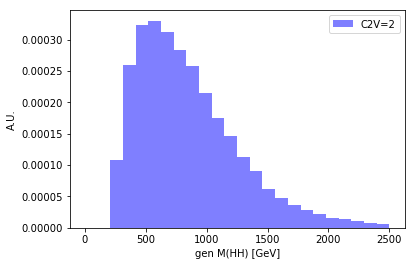

In [100]:
n, bins, patches = plt.hist(utils.IO.signal_df[0]['genMhh'], np.linspace(0,2500,25), facecolor='b',weights=utils.IO.signal_df[0]['weight'], alpha=0.5,normed=False,label='C2V=2')
plt.xlabel('gen M(HH) [GeV]')
plt.ylabel('A.U.')
plt.legend(loc = 'upper right')
plt.show()
    